In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics

In [3]:
l2_6000_run = pd.read_csv(
    f"../results/l2_dummy_RTX6000Ada_gpu.csv", header=None, names=["M", "latency", "throughput", "power", "energy", "frequency", ""]
)
l2_6000_run.set_index(["M"], inplace=True)

l2_L4_run = pd.read_csv(
    f"../results/l2_dummy_L4_gpu.csv", header=None, names=["M", "latency", "throughput", "power", "energy", "frequency", ""]
)
l2_L4_run.set_index(["M"], inplace=True)

l2_4090_run = pd.read_csv(
    f"../results/l2_dummy_RTX4090_gpu.csv", header=None, names=["M", "latency", "throughput", "power", "energy", "frequency", ""]
)
l2_4090_run.set_index(["M"], inplace=True)

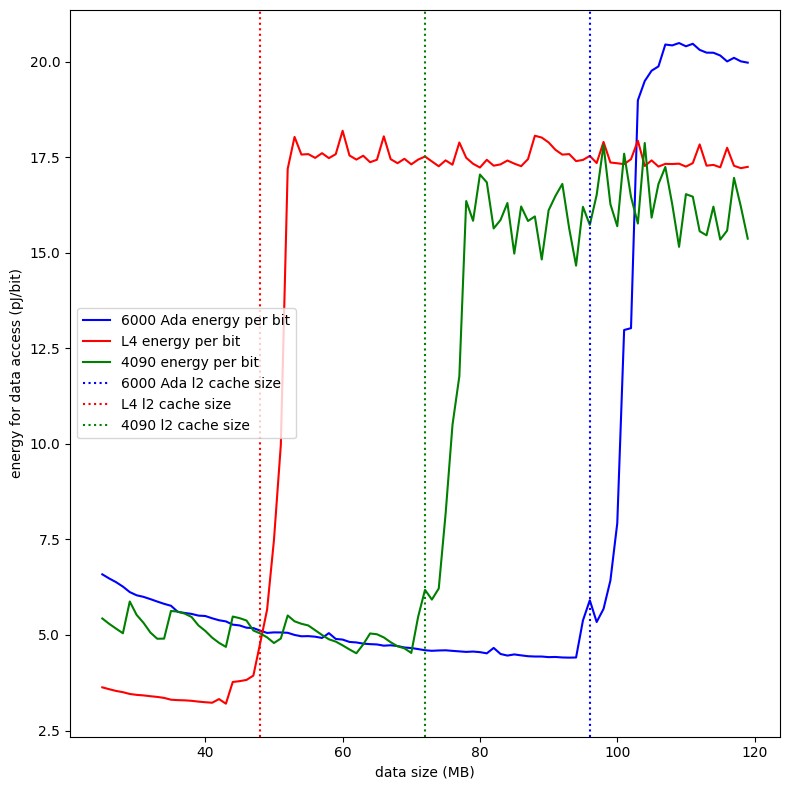

In [4]:
M_list = []
energy_6000_run_list = []
energy_6000_per_bit_list = []
energy_L4_run_list = []
energy_L4_per_bit_list = []
energy_4090_run_list = []
energy_4090_per_bit_list = []
for M in range(25, 120):
    M_list.append(M)
    energy_6000_run_list.append(l2_6000_run.loc[M, "energy"])
    energy_6000_per_bit_list.append(l2_6000_run.loc[M, "energy"] / ((M * 1024 * 1024 + 1) * 16 * (2**5)))
    energy_L4_run_list.append(l2_L4_run.loc[M, "energy"])
    energy_L4_per_bit_list.append(l2_L4_run.loc[M, "energy"] / ((M * 1024 * 1024 + 1) * 16 * (2**5)))
    energy_4090_run_list.append(l2_4090_run.loc[M, "energy"])
    energy_4090_per_bit_list.append(l2_4090_run.loc[M, "energy"] / ((M * 1024 * 1024 + 1) * 16 * (2**5)))

fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.set_xlabel("data size (MB)")
ax1.plot(M_list, energy_6000_per_bit_list, marker="", label=f"6000 Ada energy per bit", color='blue')
ax1.plot(M_list, energy_L4_per_bit_list, marker="", label=f"L4 energy per bit", color='red')
ax1.plot(M_list, energy_4090_per_bit_list, marker="", label=f"4090 energy per bit", color='green')


ax1.set_ylabel('energy for data access (pJ/bit)')

ax1.axvline(x=96, color='blue', linestyle='dotted', label='6000 Ada l2 cache size')
ax1.axvline(x=48, color='red', linestyle='dotted', label='L4 l2 cache size')
ax1.axvline(x=72, color='green', linestyle='dotted', label='4090 l2 cache size')
plt.legend()

plt.tight_layout()
plt.show()

In [5]:
print(min(energy_6000_per_bit_list))
print(min(energy_4090_per_bit_list))
print(min(energy_L4_per_bit_list))

4.407617924953426
4.52219318025671
3.203158006528468


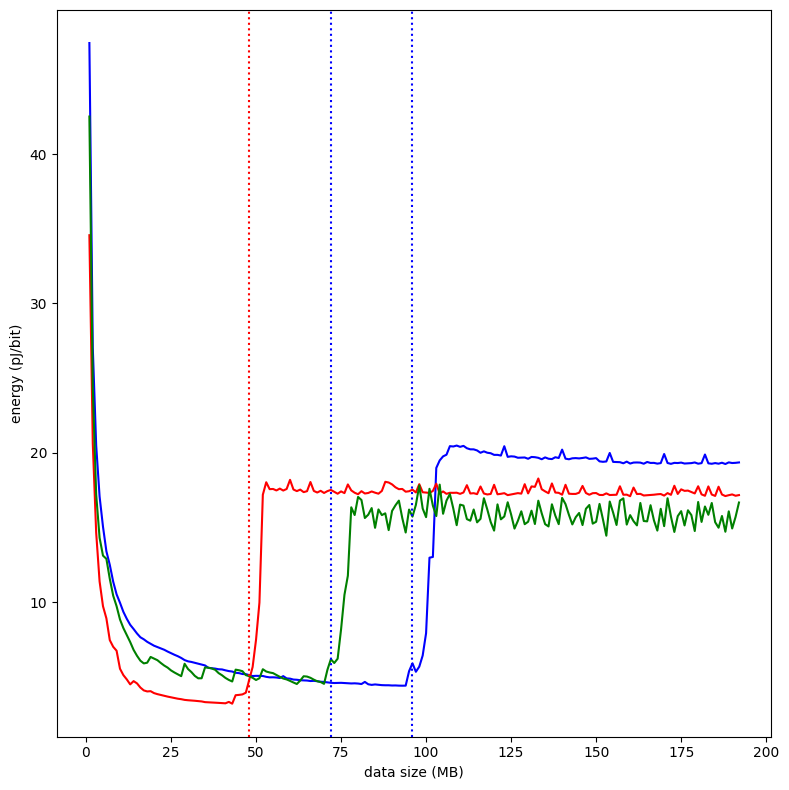

In [6]:
M_list = []
energy_6000_run_list = []
energy_6000_per_bit_list = []
flop_6000_run_list = []
energy_L4_run_list = []
energy_L4_per_bit_list = []
flop_L4_run_list = []
energy_4090_run_list = []
energy_4090_per_bit_list = []
flop_4090_run_list = []
for M in range(1, 193):
    M_list.append(M)
    energy_6000_run_list.append(l2_6000_run.loc[M, "energy"])
    energy_6000_per_bit_list.append(l2_6000_run.loc[M, "energy"] / (M * 1024 * 1024 * 16 * (2**5)))
    flop_6000_run_list.append(((M * 1024 * 1024) // 2 - 1) * 1e-12 / (float(l2_6000_run.loc[M, "latency"][:-3]) * 1e-3))
    energy_L4_run_list.append(l2_L4_run.loc[M, "energy"])
    energy_L4_per_bit_list.append(l2_L4_run.loc[M, "energy"] / (M * 1024 * 1024 * 16 * (2**5)))
    flop_L4_run_list.append(((M * 1024 * 1024) // 2 - 1) * 1e-12 / (float(l2_L4_run.loc[M, "latency"][:-3]) *1e-3))
    energy_4090_run_list.append(l2_4090_run.loc[M, "energy"])
    energy_4090_per_bit_list.append(l2_4090_run.loc[M, "energy"] / (M * 1024 * 1024 * 16 * (2**5)))
    flop_4090_run_list.append(((M * 1024 * 1024) // 2 - 1) * 1e-12 / (float(l2_4090_run.loc[M, "latency"][:-3]) *1e-3))


fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.set_xlabel("data size (MB)")
ax1.plot(M_list, energy_6000_per_bit_list, marker="", label=f"6000 Ada energy per bit", color='blue')
ax1.plot(M_list, energy_L4_per_bit_list, marker="", label=f"L4 energy per bit", color='red')
ax1.plot(M_list, energy_4090_per_bit_list, marker="", label=f"4090 energy per bit", color='green')


ax1.set_ylabel('energy (pJ/bit)')
ax1.axvline(x=48, color='red', linestyle='dotted', label='L4 l2 cache size')
ax1.axvline(x=96, color='blue', linestyle='dotted', label='6000 Ada l2 cache size')
ax1.axvline(x=72, color='blue', linestyle='dotted', label='4090 l2 cache size')


# ax2 = ax1.twinx()
# ax2.plot(M_list, flop_6000_run_list, marker="", label=f"6000 Ada flop per ms", color='lightblue', linestyle='dashed')
# ax2.plot(M_list, flop_L4_run_list, marker="", label=f"L4 flop per ms", color='salmon', linestyle='dashed')
# ax2.set_ylabel('throughput of operations (TFLOPS/s)')



plt.tight_layout()
plt.show()

In [7]:
print(statistics.mean(energy_6000_per_bit_list[125:]) - min(energy_6000_per_bit_list))
print(statistics.mean(energy_4090_per_bit_list[125:]) - min(energy_4090_per_bit_list))
print(statistics.mean(energy_L4_per_bit_list[125:]) - min(energy_L4_per_bit_list))

15.074502882787087
11.232087528894693
14.155341397672922


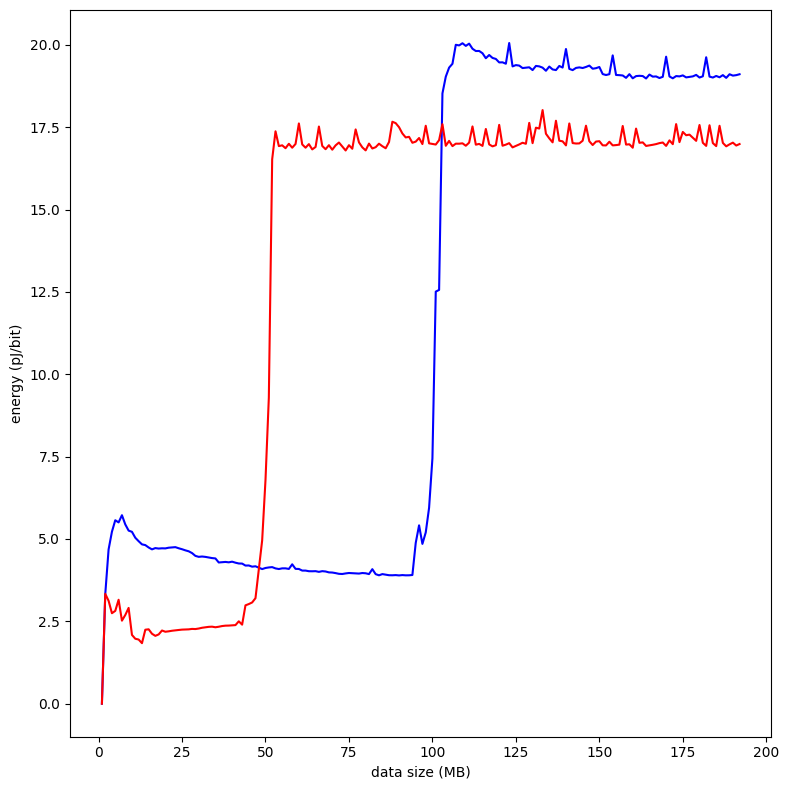

In [8]:
M_list = []
energy_6000_run_list = []
energy_6000_per_bit_list = []
energy_L4_run_list = []
energy_L4_per_bit_list = []
for M in range(1, 193):
    M_list.append(M)
    energy_6000_run_list.append(l2_6000_run.loc[M, "energy"])
    energy_6000_per_bit_list.append((l2_6000_run.loc[M, "energy"] - energy_6000_run_list[0]) / (M * 1024 * 1024 * 16 * (2**5)))
    energy_L4_run_list.append(l2_L4_run.loc[M, "energy"])
    energy_L4_per_bit_list.append((l2_L4_run.loc[M, "energy"] - energy_L4_run_list[0]) / (M * 1024 * 1024 * 16 * (2**5)))

fig, ax1 = plt.subplots(figsize=(8, 8))
ax1.set_xlabel("data size (MB)")
ax1.plot(M_list, energy_6000_per_bit_list, marker="", label=f"RTX4090 energy per bit", color='blue')
ax1.plot(M_list, energy_L4_per_bit_list, marker="", label=f"RTX4090 energy per bit", color='red')

ax1.set_ylabel('energy (pJ/bit)')

plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


In [10]:
l2_6000_run = pd.read_csv(
    f"../results/l2_dummy_RTX6000Ada_gpu.csv", header=None, names=["M", "latency", "throughput", "power", "energy", "frequency", ""]
)
l2_6000_run["latency"] = (
    l2_6000_run["latency"].str.extract(r"(\d+\.?\d*)").astype(float)
)
# l2_6000_run = l2_6000_run[0:91]
data = pd.DataFrame()
data['#bit'] = (l2_6000_run['M'] * 1024 * 1024 + 1) * 16 * (2**5)
data['#flop'] = l2_6000_run['M'] * 1024 * 1024
data['latency'] = l2_6000_run['latency']
data['energy'] = l2_6000_run['energy']
data['size_dram'] = 48 * 1024 * 1024 * 1024
data['size_l2'] = 96 * 1024 * 1024
data['size_l1'] = 128 * 1024
data['#SM'] = 142
data['die_size'] = 608.4
data['M'] = l2_6000_run['M']


l2_L4_run = pd.read_csv(
    f"../results/l2_dummy_L4_gpu.csv", header=None, names=["M", "latency", "throughput", "power", "energy", "frequency", ""]
)
l2_L4_run["latency"] = (
    l2_L4_run["latency"].str.extract(r"(\d+\.?\d*)").astype(float)
)
# l2_L4_run = l2_L4_run[0:45]
data2 = pd.DataFrame()
data2['#bit'] = (l2_L4_run['M'] * 1024 * 1024 + 1) * 16 * (2**5)
data2['#flop'] = l2_L4_run['M'] * 1024 * 1024
data2['latency'] = l2_L4_run['latency']
data2['energy'] = l2_L4_run['energy']
data2['size_dram'] = 24 * 1024 * 1024 * 1024
data2['size_l2'] = 48 * 1024 * 1024
data2['size_l1'] = 128 * 1024
data2['#SM'] = 58
data2['die_size'] = 295
data2['M'] = l2_L4_run['M']

data = pd.concat([data, data2], axis=0)
data.reset_index(drop=True, inplace=True)

# print(data)

X = data[['latency', 'size_dram', 'size_l2', 'size_l1', '#SM', 'die_size', '#bit', '#flop']]
y = data['energy']

X["latency_size_dram"] = X["latency"] * X["size_dram"]
X["latency_size_l2"] = X["latency"] * X["size_l2"]
X["latency_#SM"] = X["latency"] * X["#SM"]
X["#bit_sqrt_die_size"] = X["#bit"] * np.sqrt(X["die_size"])

X = X[['latency_size_dram', 'latency_size_l2', 'latency_#SM', '#bit', '#bit_sqrt_die_size', '#flop']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X)

model = LinearRegression(positive=True)
model.fit(X_scaled, y)

coefficients = model.coef_

print(f'Coefficients: {coefficients}')


     latency_size_dram  latency_size_l2  latency_#SM          #bit  \
0         1.000384e+10     1.953875e+07      27.5622           512   
1         1.443624e+10     2.819579e+07      39.7742     536871424   
2         1.453417e+10     2.838705e+07      40.0440    1073742336   
3         1.447748e+10     2.827632e+07      39.8878    1610613248   
4         1.449809e+10     2.831659e+07      39.9446    2147484160   
..                 ...              ...          ...           ...   
381       6.245879e+11     1.219898e+09    1405.7576  100931731968   
382       6.311927e+11     1.232798e+09    1420.6230  101468602880   
383       6.319916e+11     1.234359e+09    1422.4210  102005473792   
384       6.365863e+11     1.243333e+09    1432.7624  102542344704   
385       6.403745e+11     1.250731e+09    1441.2884  103079215616   

     #bit_sqrt_die_size      #flop  
0          1.262887e+04          0  
1          1.324234e+10    1048576  
2          2.648468e+10    2097152  
3          

/tmp/ipykernel_386834/3979680495.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["latency_size_dram"] = X["latency"] * X["size_dram"]


<function matplotlib.pyplot.show(close=None, block=None)>

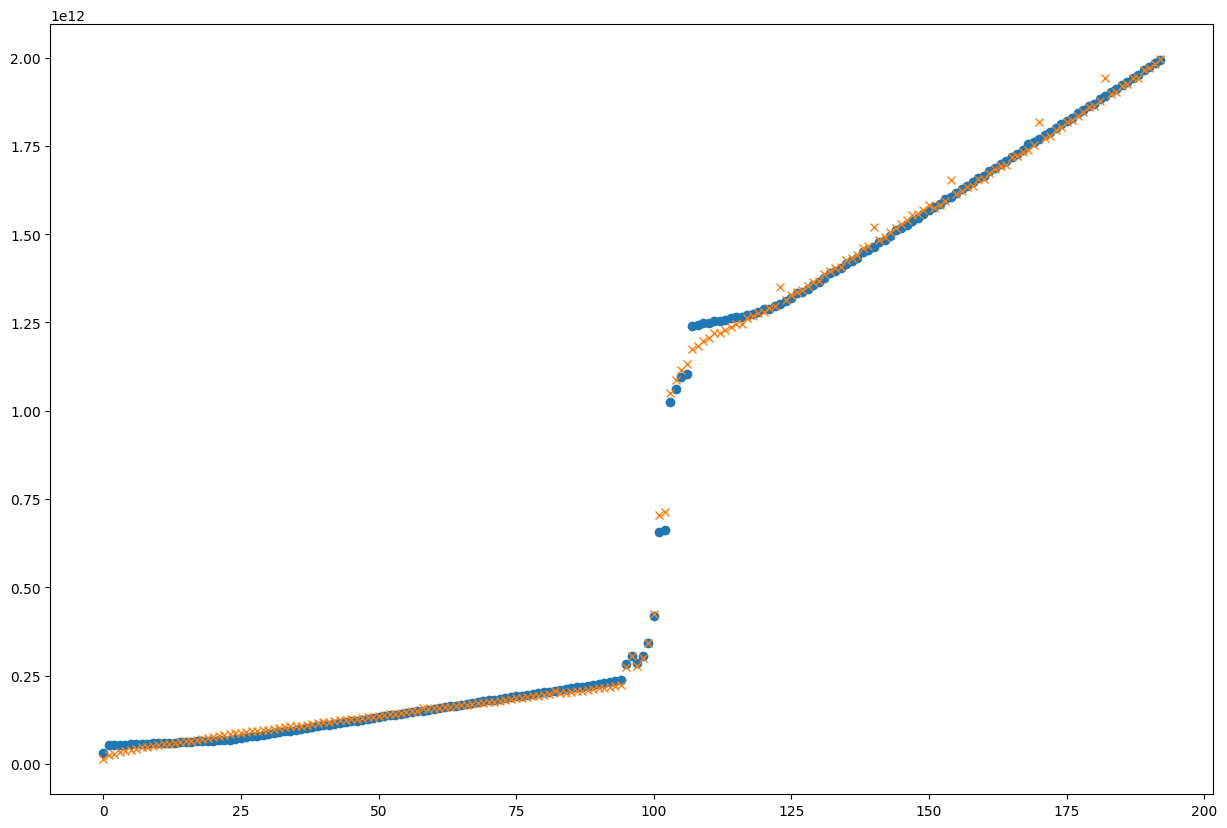

In [23]:
plt.figure(figsize=(15, 10))
data['predicted_energy'] = model.predict(scaler.fit_transform(X))
plt.plot(data['M'], data['predicted_energy'], 'o')
plt.plot(data['M'], data['energy'], 'x')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

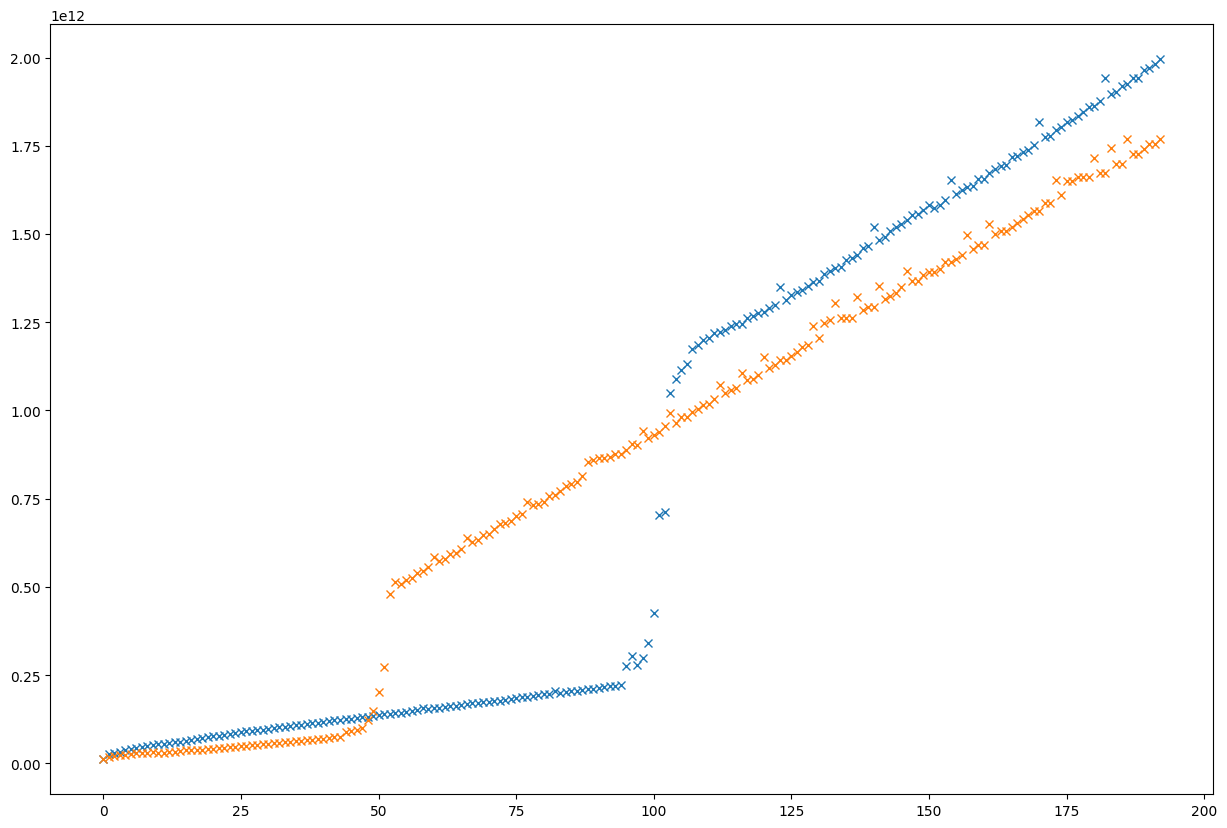

In [12]:
l2_6000_run = pd.read_csv(
    f"r../esults/l2_dummy_RTX6000Ada_gpu.csv", header=None, names=["M", "latency", "throughput", "power", "energy", "frequency", ""]
)
l2_L4_run = pd.read_csv(
    f"../results/l2_dummy_L4_gpu.csv", header=None, names=["M", "latency", "throughput", "power", "energy", "frequency", ""]
)
plt.figure(figsize=(15, 10))
plt.plot(l2_6000_run['M'], l2_6000_run['energy'], 'x')
plt.plot(l2_L4_run['M'], l2_L4_run['energy'], 'x')
plt.show

In [15]:
l2_6000_run = pd.read_csv(
    f"../results/l2_dummy_RTX6000Ada_gpu.csv", header=None, names=["M", "latency", "throughput", "power", "energy", "frequency", ""]
)
l2_6000_run["latency"] = (
    l2_6000_run["latency"].str.extract(r"(\d+\.?\d*)").astype(float)
)
# l2_6000_run = l2_6000_run[0:91]
data = pd.DataFrame()
data['#bit'] = (l2_6000_run['M'] * 1024 * 1024 + 1) * 16 * (2**5)
data['#flop'] = l2_6000_run['M'] * 1024 * 1024
data['latency'] = l2_6000_run['latency']
data['energy'] = l2_6000_run['energy']
data['size_dram'] = 48 * 1024 * 1024 * 1024
data['size_l2'] = 96 * 1024 * 1024
data['size_l1'] = 128 * 1024
data['#SM'] = 142
data['die_size'] = 608.4
data['M'] = l2_6000_run['M']


l2_L4_run = pd.read_csv(
    f"results/l2_dummy_L4_gpu.csv", header=None, names=["M", "latency", "throughput", "power", "energy", "frequency", ""]
)
l2_L4_run["latency"] = (
    l2_L4_run["latency"].str.extract(r"(\d+\.?\d*)").astype(float)
)
# l2_L4_run = l2_L4_run[0:45]
data2 = pd.DataFrame()
data2['#bit'] = (l2_L4_run['M'] * 1024 * 1024 + 1) * 16 * (2**5)
data2['#flop'] = l2_L4_run['M'] * 1024 * 1024
data2['latency'] = l2_L4_run['latency']
data2['energy'] = l2_L4_run['energy']
data2['size_dram'] = 24 * 1024 * 1024 * 1024
data2['size_l2'] = 48 * 1024 * 1024
data2['size_l1'] = 128 * 1024
data2['#SM'] = 58
data2['die_size'] = 295
data2['M'] = l2_L4_run['M']

data = pd.concat([data, data2], axis=0)
data.reset_index(drop=True, inplace=True)

# print(data)

X = data[['latency', '#SM', 'die_size', '#bit', '#flop']]
y = data['energy']

X['latency_#SM'] = X['latency'] * X['#SM']
X['die_size_#bit'] = np.sqrt(X['die_size']) * X['#bit']

X = X[['latency_#SM', '#bit', 'die_size_#bit', '#flop']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X)

model = LinearRegression(positive=True)
model.fit(X_scaled, y)

coefficients = model.coef_

print(f'Coefficients: {coefficients}')

     latency_#SM          #bit  die_size_#bit
0        27.5622           512   1.262887e+04
1        39.7742     536871424   1.324234e+10
2        40.0440    1073742336   2.648468e+10
3        39.8878    1610613248   3.972701e+10
4        39.9446    2147484160   5.296934e+10
..           ...           ...            ...
381    1405.7576  100931731968   1.733559e+12
382    1420.6230  101468602880   1.742780e+12
383    1422.4210  102005473792   1.752002e+12
384    1432.7624  102542344704   1.761223e+12
385    1441.2884  103079215616   1.770444e+12

[386 rows x 3 columns]
Coefficients: [3.96403262e+11 0.00000000e+00 2.91366686e+11]


/tmp/ipykernel_386834/2972923083.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['latency_#SM'] = X['latency'] * X['#SM']
/tmp/ipykernel_386834/2972923083.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['die_size_#bit'] = np.sqrt(X['die_size']) * X['#bit']


In [22]:
l2_6000_run = pd.read_csv(
    f"../results/l2_dummy_RTX6000Ada_gpu.csv", header=None, names=["M", "latency", "throughput", "power", "energy", "frequency", ""]
)
l2_6000_run["latency"] = (
    l2_6000_run["latency"].str.extract(r"(\d+\.?\d*)").astype(float)
)
# l2_6000_run = l2_6000_run[0:91]
data = pd.DataFrame()
data['#bit'] = (l2_6000_run['M'] * 1024 * 1024 + 1) * 16 * (2**5)
data['#flop'] = l2_6000_run['M'] * 1024 * 1024
data['latency'] = l2_6000_run['latency']
data['energy'] = l2_6000_run['energy']
data['size_dram'] = 48 * 1024 * 1024 * 1024
data['size_l2'] = 96 * 1024 * 1024
data['size_l1'] = 128 * 1024
data['#SM'] = 142
data['die_size'] = 608.4
data['M'] = l2_6000_run['M']

X = data[['latency', '#bit', '#flop']]
y = data['energy']

X = X[['latency', '#bit']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X)

model = LinearRegression(positive=True)
model.fit(X_scaled, y)

coefficients = model.coef_

print(f'Coefficients: {coefficients}')

     latency          #bit
0     0.1941           512
1     0.2801     536871424
2     0.2820    1073742336
3     0.2809    1610613248
4     0.2813    2147484160
..       ...           ...
188   7.2474  100931731968
189   7.2939  101468602880
190   7.3249  102005473792
191   7.3650  102542344704
192   7.4036  103079215616

[193 rows x 2 columns]
Coefficients: [6.85997741e+11 3.94672231e+10]
